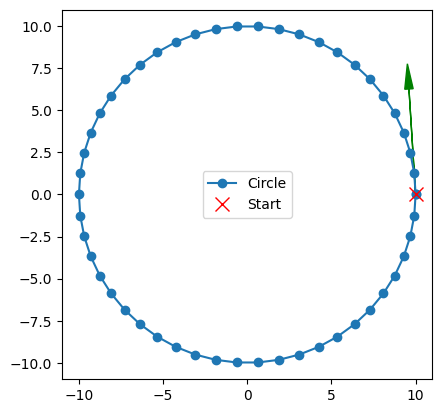

In [12]:
import ezdxf
import numpy as np
import math
import matplotlib.pyplot as plt

def extract_circle_points(dxf_file, num_points=100, clockwise=False):
    doc = ezdxf.readfile(dxf_file)
    msp = doc.modelspace()
    circles_data = []

    for circle in msp.query("CIRCLE"):
        center = circle.dxf.center
        radius = circle.dxf.radius

        # 采样角度
        angles = np.linspace(0, 2*math.pi, num_points, endpoint=False)
        if clockwise:
            angles = angles[::-1]  # 顺时针方向

        points = [(center.x + radius*math.cos(theta),
                   center.y + radius*math.sin(theta)) for theta in angles]

        # 闭合圆：最后加上起点
        points.append(points[0])

        circles_data.append({
            "center": (center.x, center.y),
            "radius": radius,
            "points": points
        })

    return circles_data


def visualize_circles(circles_data):
    fig, ax = plt.subplots()
    for circle in circles_data:
        xs, ys = zip(*circle["points"])
        ax.plot(xs, ys, 'o-', label="Circle")

        # 标注起点
        start_x, start_y = circle["points"][0]
        ax.plot(start_x, start_y, 'rx', markersize=10, label="Start")

        # 绘制方向箭头（起点到第二个点）
        next_x, next_y = circle["points"][1]
        dx, dy = next_x - start_x, next_y - start_y
        ax.arrow(start_x, start_y, dx*5, dy*5,
                 head_width=0.5, head_length=1.5, fc='green', ec='green')

    ax.set_aspect('equal')
    ax.legend()
    plt.show()


# 示例调用
circles = extract_circle_points("circle.dxf", num_points=50, clockwise=False)
visualize_circles(circles)